# Explore, Visualize, and Analyze Data

In [41]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

## Reading the datasets

In [5]:
train_data = pd.read_csv('dataset/train.csv', sep=',',low_memory=False)
store_data = pd.read_csv('dataset/store.csv', sep=',',low_memory=False)
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [6]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


### Description 
Making a first summary for eache table that gathers basic information such as the minima the maxima,the mean and the number of elements

In [7]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Cleaning the dataset
Here we are using pandas, thus, in order to clean our dataset we are going be to using some elementary strategies.
Depending on the amount of missing datas we either :

- Fill them following a chosen method such as the median or the mean when it comes to quantitatives datas
- Fill them following the previous or next value or by linear interpolation, polynomial or spline smoothing if we are dealing with time series data.
- Drop them if they are a few and form a group

Therefore in this case we have chose to drop them

In [9]:
#Dropping Null Data
store_data.corr()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.027220,-0.050319,-0.004648,0.007486,0.007584,0.039640
CompetitionDistance,-0.027220,1.000000,-0.059126,0.025124,-0.145717,-0.060552,-0.109504
CompetitionOpenSinceMonth,-0.050319,-0.059126,1.000000,-0.052250,-0.011485,-0.035504,0.047815
CompetitionOpenSinceYear,-0.004648,0.025124,-0.052250,1.000000,-0.076520,-0.079984,0.006354
Promo2,0.007486,-0.145717,-0.011485,-0.076520,1.000000,NaN,NaN
Promo2SinceWeek,0.007584,-0.060552,-0.035504,-0.079984,NaN,1.000000,-0.217650
Promo2SinceYear,0.039640,-0.109504,0.047815,0.006354,NaN,-0.217650,1.000000


In [10]:
#Dropping Null Data
train_data = train_data.dropna()
train_data.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


# Visualize Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f9959f860>]], dtype=object)

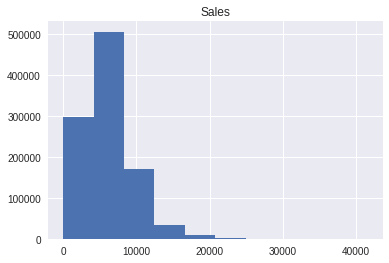

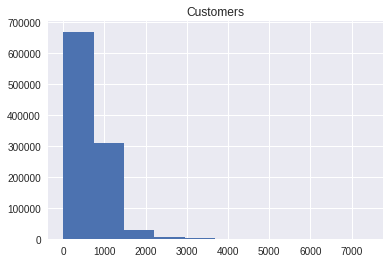

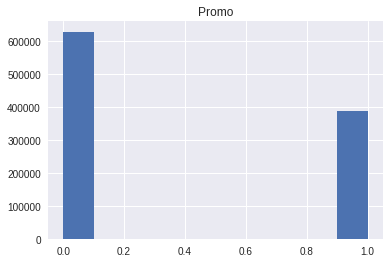

In [11]:
#Histrogramme for some entries of store data
train_data.hist(column='Sales')
train_data.hist(column='Customers')
train_data.hist(column='Promo')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f98aae470>]], dtype=object)

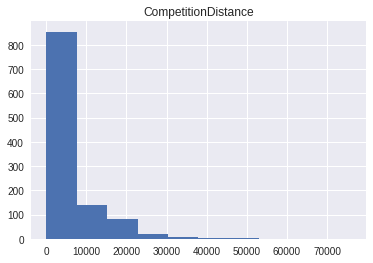

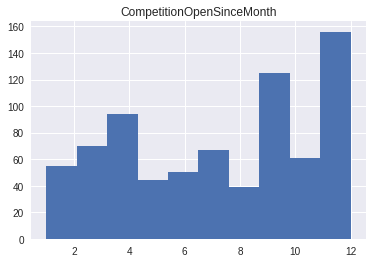

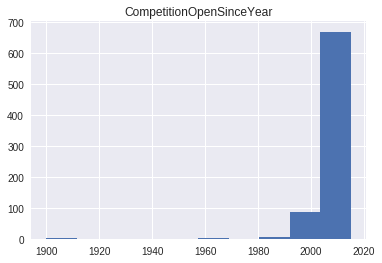

In [12]:
#Histrogramme for some entries of train data
store_data.hist(column='CompetitionDistance')
store_data.hist(column='CompetitionOpenSinceMonth')
store_data.hist(column='CompetitionOpenSinceYear')

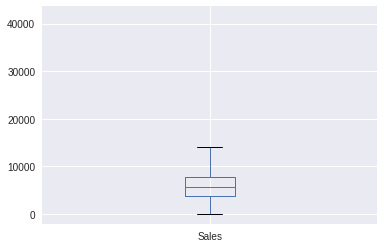

In [13]:
#Boxplot for some entries of store data
train_data.boxplot(column='Sales')


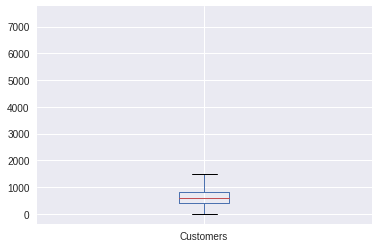

In [14]:
train_data.boxplot(column='Customers')

In [15]:
#Selection
store10k=train_data[train_data["Sales"]>10000][["Customers","Promo","SchoolHoliday"]]
store10k.describe()

,Customers,Promo,SchoolHoliday
count,113633.000000,113633.000000,113633.000000
mean,1392.229704,0.738175,0.221951
std,599.032002,0.439630,0.415560
min,216.000000,0.000000,0.000000
25%,999.000000,0.000000,0.000000
50%,1231.000000,1.000000,0.000000
75%,1573.000000,1.000000,0.000000
max,7388.000000,1.000000,1.000000


In [16]:
#Bivariate
#train_data.boxplot(column="Sales",by="Customers")
#plt.show()

In [17]:
#Contingency table
table=pd.crosstab(store_data["Store"],store_data["CompetitionOpenSinceMonth"])
print(table)

CompetitionOpenSinceMonth  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
Store                                                                       
1                             0     0     0     0     0     0     0     0   
2                             0     0     0     0     0     0     0     0   
3                             0     0     0     0     0     0     0     0   
4                             0     0     0     0     0     0     0     0   
5                             0     0     0     1     0     0     0     0   
6                             0     0     0     0     0     0     0     0   
7                             0     0     0     1     0     0     0     0   
8                             0     0     0     0     0     0     0     0   
9                             0     0     0     0     0     0     0     1   
10                            0     0     0     0     0     0     0     0   
11                            0     0     0     0     0     0     0     0   

# Exploring 


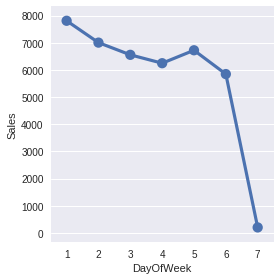

In [18]:
sns.factorplot(data=train_data,x="DayOfWeek",y="Sales")

### More elaborated cleaning
Getting redding of the information related to a closed store

In [26]:
train=train_data[(train_data["Sales"]!=0) & (train_data["Open"]!=0)]
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


filling withe the median these store_data colomuns

In [28]:
storefill=store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(),inplace=True)

### Merging
In order to evaluate the relevance of some othe parameters such as the StoreType 

In [35]:
train_store = pd.merge(train, store_data, how = 'inner', on = 'Store')
train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,2,2015-07-21,3558,469,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


### Correlation

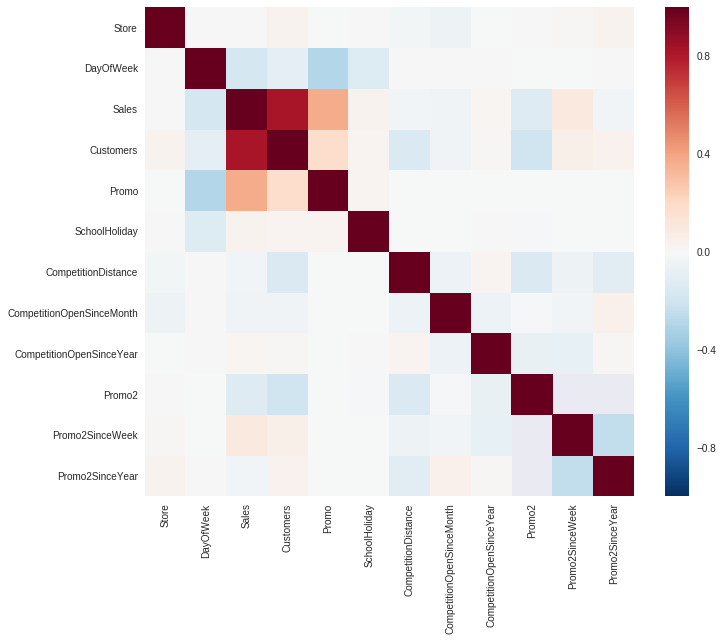

In [36]:
heatmapcorr=train_store.drop('Open',axis=1).corr()
f,ax=plt.subplots(figsize=(11,9))

sns.heatmap(heatmapcorr,square=True,ax=ax)

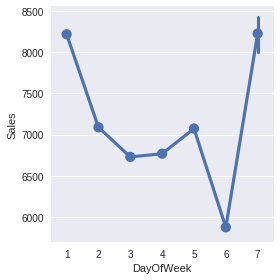

In [37]:
# Sales per day trends
sns.factorplot(data=train_store,x="DayOfWeek",y="Sales")

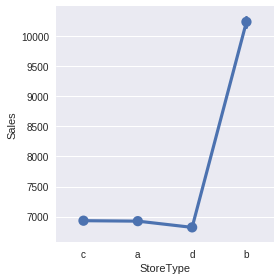

In [38]:
# Sales per day trends
sns.factorplot(data=train_store,x="StoreType",y="Sales")

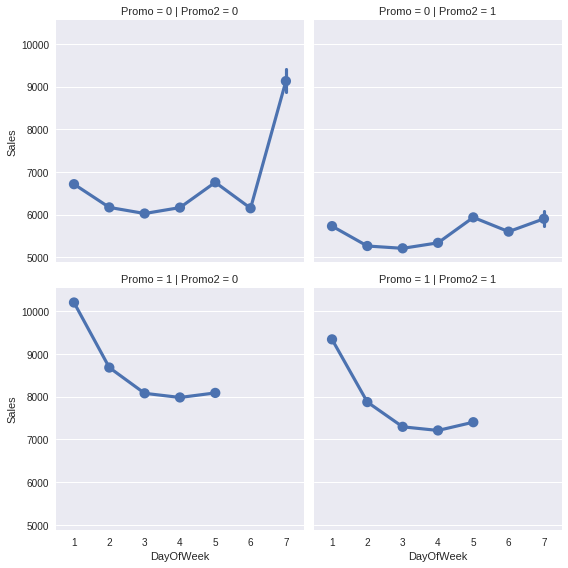

In [45]:
sns.factorplot(data=train_store,x="DayOfWeek",y="Sales",row="Promo",col="Promo2")

# Training & Evaluating

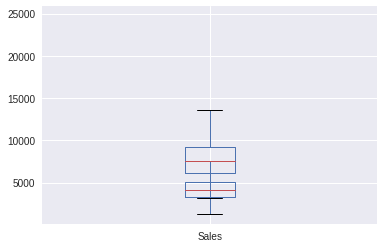

In [20]:
no_promo = train_data[train_data['Promo']==0]
promo = train_data[train_data['Promo']==1]
train_no_promo = no_promo.groupby('Store',as_index=True).mean()
train_promo = promo.groupby('Store').mean()
train_no_promo.boxplot(column='Sales')
train_promo.boxplot(column='Sales')
#trainbystore = train_data.groupby(['Store','Promo']).mean()
#trainbystore.boxplot(column='Sales')

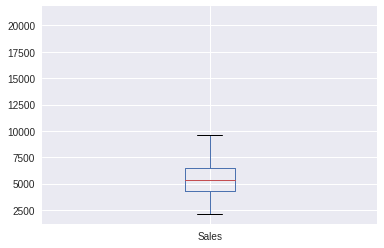

In [21]:
no_holiday = train_data[train_data['SchoolHoliday']==0]
holiday = train_data[train_data['SchoolHoliday']==1]
train_no_holiday = no_holiday.groupby('Store',as_index=True).mean()
train_holiday = holiday.groupby('Store').mean()
train_no_holiday.boxplot(column='Sales')


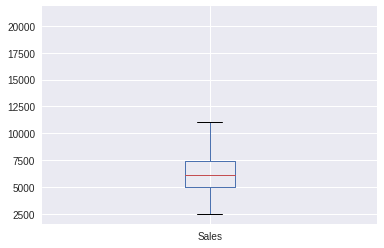

In [22]:
train_holiday.boxplot(column='Sales')

In [42]:
join = train_data.join(store_data.set_index('Store'),on='Store')
le = preprocessing.LabelEncoder()
newdata = le.fit_transform(join['Date'])
join['Date']=newdata
join = join.dropna()
#join['Date']=pd.to_datetime(join['Date'])
join

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,5,941,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,941,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
10,11,5,941,10457,1236,1,1,0,1,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
13,14,5,941,6544,710,1,1,0,1,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
14,15,5,941,9191,766,1,1,0,1,d,c,4110.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
16,17,5,941,8430,946,1,1,0,1,a,a,50.0,12.0,2005.0,1,26.0,2010.0,"Jan,Apr,Jul,Oct"
17,18,5,941,10071,936,1,1,0,1,d,c,13840.0,6.0,2010.0,1,14.0,2012.0,"Jan,Apr,Jul,Oct"
19,20,5,941,9593,974,1,1,0,0,d,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
20,21,5,941,9515,682,1,1,0,1,c,c,550.0,10.0,1999.0,1,45.0,2009.0,"Jan,Apr,Jul,Oct"
23,24,5,941,14190,1082,1,1,0,1,a,c,4590.0,3.0,2000.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"


In [43]:
# Exemple de modèle de régression linéaire
y = join['Sales'].values
X = join[(['Date','Customers','Open','Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)
regr = linear_model.LinearRegression()
reg_res = regr.fit(X_train,y_train)
y_predict=reg_res.predict(X_test)
print(np.linalg.norm(y_predict-y_test)/len(y_test))


6.78197973272


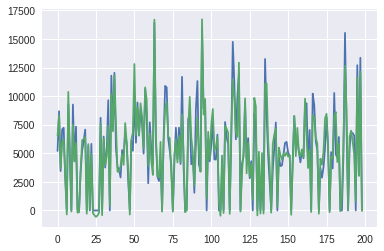

In [44]:
#plt.plot(y_predict)
#plt.plot(y_test)
np.shape(y_predict)
np.shape(y_test)
#print(y_test)
plt.plot(y_test[1:200])
plt.plot(y_predict[1:200])
plt.show()

In [ ]:
y_predict1=reg_res.predict(X_train)
plt.plot(y_train)
plt.plot(y_predict1)